#### Name : Deepak AV 
##### Logistic regression , Linear Discriminant Analysis, CART - Decision Tree
###### Problem 2 - Contraceptive Method Dataset

###### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [1]:
#importing all basic necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [2]:
os.getcwd()

'C:\\Users\\WELCOME\\Downloads'

In [3]:
#Reading the Dataset
df = pd.read_excel("Contraceptive_method_dataset.xlsx")
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
#getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
#calculating all the statistical values like mean, median etc.
df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1402.000000,1452.000000,1473.000000
mean,32.606277,3.254132,2.137814
std,8.274927,2.365212,0.864857
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,39.000000,4.000000,3.000000
max,49.000000,16.000000,4.000000


In [6]:
#Shows the Shapeof the datasaet
df.shape

(1473, 10)

In [7]:
#checking the null values whether there are not
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [8]:
#calculating the mean for the numerical variables present in the dataset
df.mean(axis=0)

Wife_age               32.606277
No_of_children_born     3.254132
Husband_Occupation      2.137814
dtype: float64

In [9]:
#Replacing the the null values with the calculated mean
df["Wife_age"].fillna(value = 32, inplace = True)

In [10]:
#Replacing the the null values with the calculated mean
df["No_of_children_born"].fillna(value = 3, inplace = True)

In [11]:
#Again checking with the null values
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [12]:
#Checking for the duplicates present in the dataset
df.duplicated().sum()

85

In [13]:
#Displaying the total number of values present in the each category under each variable
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

WIFE_ EDUCATION :  4
Uneducated    152
Primary       334
Secondary     410
Tertiary      577
Name: Wife_ education, dtype: int64


HUSBAND_EDUCATION :  4
Uneducated     44
Primary       178
Secondary     352
Tertiary      899
Name: Husband_education, dtype: int64


WIFE_RELIGION :  2
Non-Scientology     220
Scientology        1253
Name: Wife_religion, dtype: int64


WIFE_WORKING :  2
Yes     369
No     1104
Name: Wife_Working, dtype: int64


STANDARD_OF_LIVING_INDEX :  4
Very Low     129
Low          229
High         431
Very High    684
Name: Standard_of_living_index, dtype: int64


MEDIA_EXPOSURE  :  2
Not-Exposed     109
Exposed        1364
Name: Media_exposure , dtype: int64


CONTRACEPTIVE_METHOD_USED :  2
No     629
Yes    844
Name: Contraceptive_method_used, dtype: int64




In [14]:
#Replacing the categorical variable into the numerical variable according the description given in the question
df['Wife_ education'].replace(['Uneducated','Primary','Secondary','Tertiary'],[1,2,3,4], inplace=True)
df['Husband_education'].replace(['Uneducated','Primary','Secondary','Tertiary'],[1,2,3,4], inplace=True)
df['Wife_religion'].replace(['Scientology','Non-Scientology'],[1,0], inplace=True)
df['Husband_education'].replace(['Uneducated','Primary','Secondary','Tertiary'],[1,2,3,4], inplace=True)
df['Wife_Working'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Standard_of_living_index'].replace(['Very Low','Low','Very High','High'],[1,2,3,4], inplace=True)
df['Media_exposure '].replace(['Not-Exposed', 'Exposed'],[0, 1], inplace=True)
df['Contraceptive_method_used'].replace(['No', 'Yes'],[0, 1], inplace=True)

In [15]:
#Checking whether the dataset as been changed in to the numerical dataset 
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,4,1,0
1,45.0,1,3,10.0,1,0,3,3,1,0
2,43.0,2,3,7.0,1,0,3,3,1,0
3,42.0,3,2,9.0,1,0,3,4,1,0
4,36.0,3,3,8.0,1,0,3,2,1,0


In [16]:
#checking for the information after replacing with numerical variable in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int64  
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int64  
 5   Wife_Working               1473 non-null   int64  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   int64  
 9   Contraceptive_method_used  1473 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 115.2 KB


In [17]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [18]:
df.shape

(1473, 10)

In [19]:
#checks for the duplicates in the dataset after replacing into the numerical variable
df.duplicated().sum()

85

In [20]:
#Deleting the duplicates from the dataset 
df = df.drop_duplicates()

In [21]:
#checks whether duplicates are there or not
df.duplicated().sum()

0

In [22]:
#checking for the shape of dataset after done with the data cleaning
df.shape

(1388, 10)

In [23]:
#Calculating the Statistical Analysis after done with the Data Cleaning
df.describe()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,32.533862,2.913545,3.402738,3.287464,0.851585,0.250720,2.177954,2.952450,0.921470,0.557637
std,8.102151,1.015250,0.826677,2.385715,0.355639,0.433584,0.853782,0.914066,0.269101,0.496846
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000
75%,38.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000


#### Univariate Analysis

<AxesSubplot:>

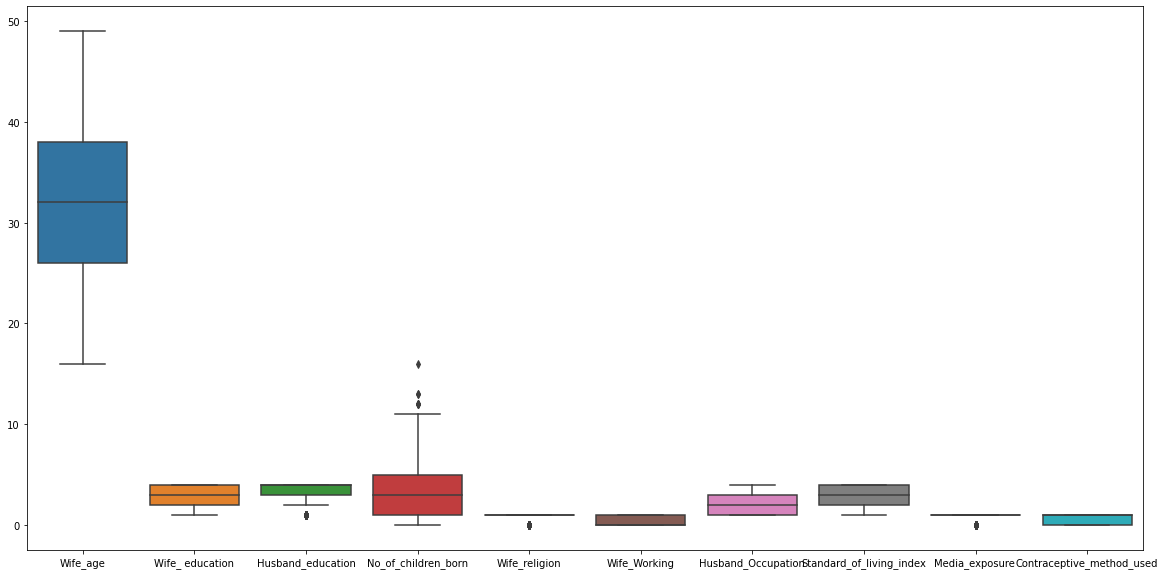

In [24]:
#Showing the Univariate Data Visulization
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

#### Bivariate Analysis

<AxesSubplot:>

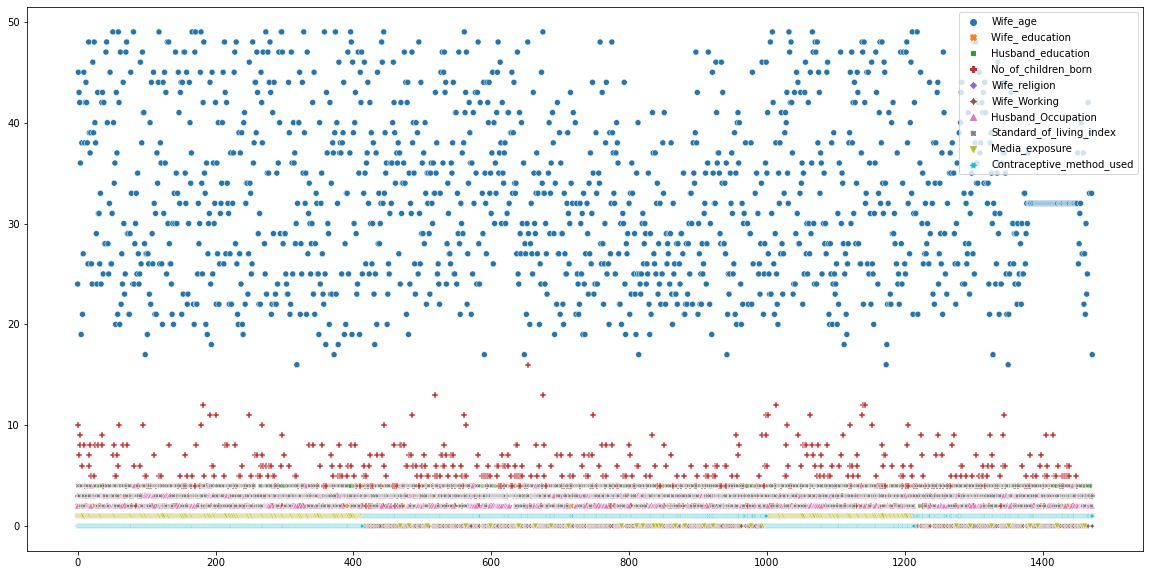

In [25]:
#Showing the Bivariate Data Visulization
plt.figure(figsize=(20,10))
sns.scatterplot(data=df)

#### Multivariate Analysis

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

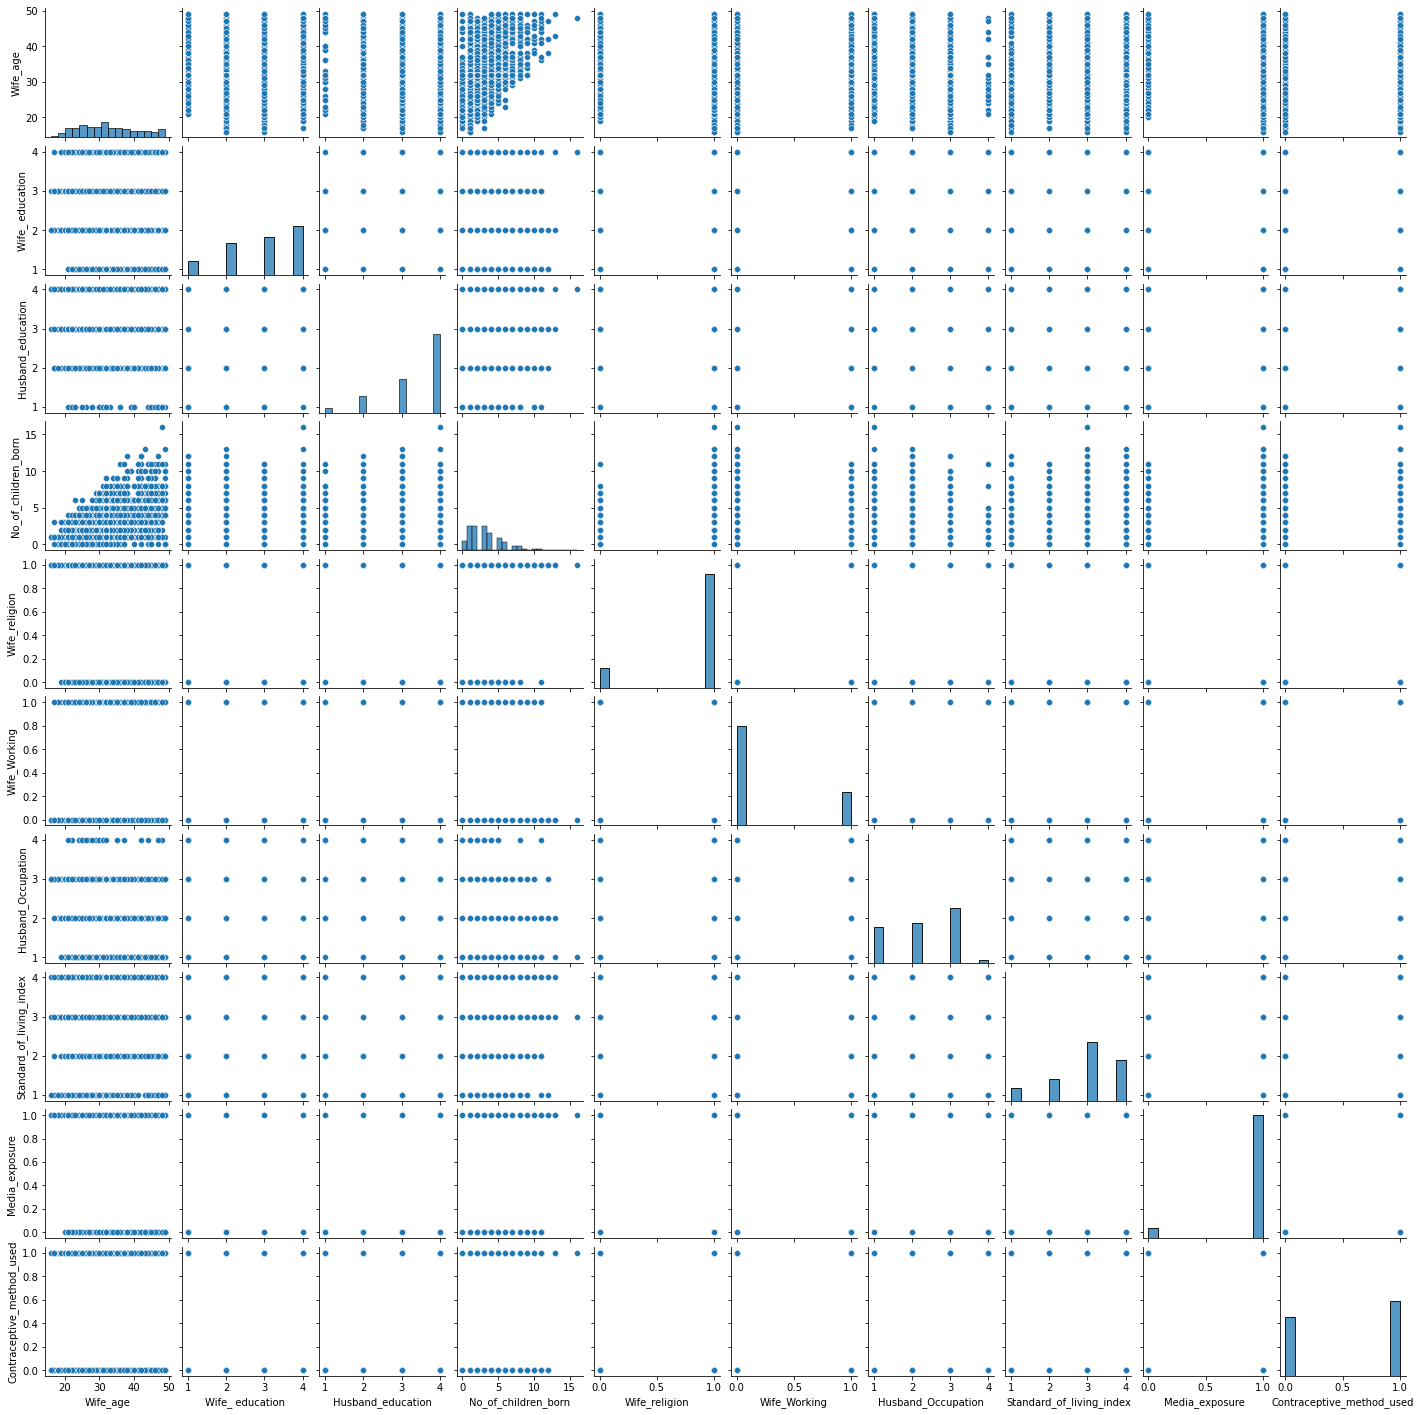

In [26]:
#Showing the Multivariate Data Visulization
plt.figure(figsize=(10,5))
sns.pairplot(data=df,size=2)

<AxesSubplot:>

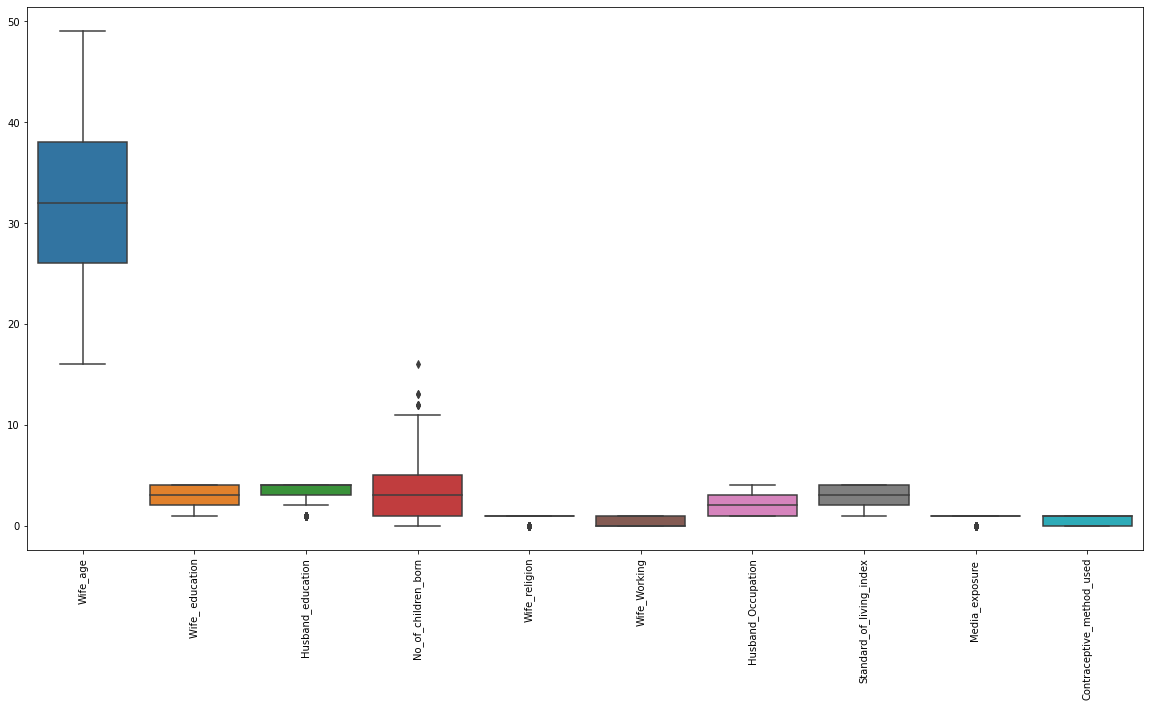

In [27]:
#Checking whether the outliers are present are not using the box plot
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=df)

In [28]:
#Removing the outliers present in the data
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
for i in df.columns:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

<AxesSubplot:>

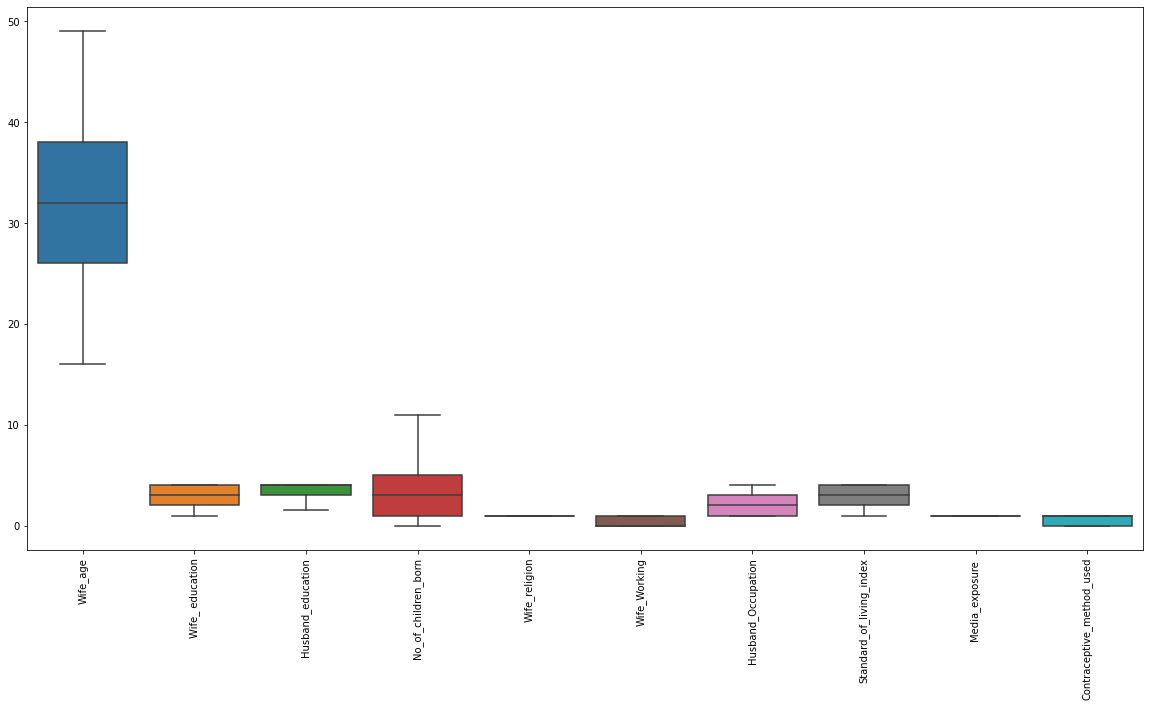

In [30]:
#Checking for outliers after removing it 
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=df)

In [31]:
#Correlating the dataset in the pearson method
df_corr = df.corr(method='pearson')
df_corr

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
Wife_age,1.000000,-0.056704,-0.052847,0.530196,NaN,0.032061,-0.188114,0.077710,NaN,-0.098006
Wife_ education,-0.056704,1.000000,0.611982,-0.195747,NaN,0.057467,-0.368180,0.203003,NaN,0.225713
Husband_education,-0.052847,0.611982,1.000000,-0.189635,NaN,-0.003538,-0.322964,0.239032,NaN,0.139746
No_of_children_born,0.530196,-0.195747,-0.189635,1.000000,NaN,-0.103172,-0.022172,0.004148,NaN,0.119665
Wife_religion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,0.032061,0.057467,-0.003538,-0.103172,NaN,1.000000,-0.013493,0.028284,NaN,-0.043701
Husband_Occupation,-0.188114,-0.368180,-0.322964,-0.022172,NaN,-0.013493,1.000000,-0.134193,NaN,-0.036944
Standard_of_living_index,0.077710,0.203003,0.239032,0.004148,NaN,0.028284,-0.134193,1.000000,NaN,0.106054
Media_exposure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,-0.098006,0.225713,0.139746,0.119665,NaN,-0.043701,-0.036944,0.106054,NaN,1.000000


In [32]:
#Dropping the null values columns present afte correlation
df = df.drop(df.columns[[4,8]], axis=1)

In [33]:
df

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_Working,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used
0,24.0,2.0,3.0,3.0,0.0,2.0,4.0,0.0
1,45.0,1.0,3.0,10.0,0.0,3.0,3.0,0.0
2,43.0,2.0,3.0,7.0,0.0,3.0,3.0,0.0
3,42.0,3.0,2.0,9.0,0.0,3.0,4.0,0.0
4,36.0,3.0,3.0,8.0,0.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...
1466,42.0,2.0,4.0,3.0,0.0,2.0,3.0,1.0
1468,33.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0
1470,39.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0
1471,33.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0


In [34]:
#Correlatio is done after dropping the columns present null values
df_corr = df.corr(method='pearson')
df_corr

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_Working,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used
Wife_age,1.000000,-0.056704,-0.052847,0.530196,0.032061,-0.188114,0.077710,-0.098006
Wife_ education,-0.056704,1.000000,0.611982,-0.195747,0.057467,-0.368180,0.203003,0.225713
Husband_education,-0.052847,0.611982,1.000000,-0.189635,-0.003538,-0.322964,0.239032,0.139746
No_of_children_born,0.530196,-0.195747,-0.189635,1.000000,-0.103172,-0.022172,0.004148,0.119665
Wife_Working,0.032061,0.057467,-0.003538,-0.103172,1.000000,-0.013493,0.028284,-0.043701
Husband_Occupation,-0.188114,-0.368180,-0.322964,-0.022172,-0.013493,1.000000,-0.134193,-0.036944
Standard_of_living_index,0.077710,0.203003,0.239032,0.004148,0.028284,-0.134193,1.000000,0.106054
Contraceptive_method_used,-0.098006,0.225713,0.139746,0.119665,-0.043701,-0.036944,0.106054,1.000000


<AxesSubplot:>

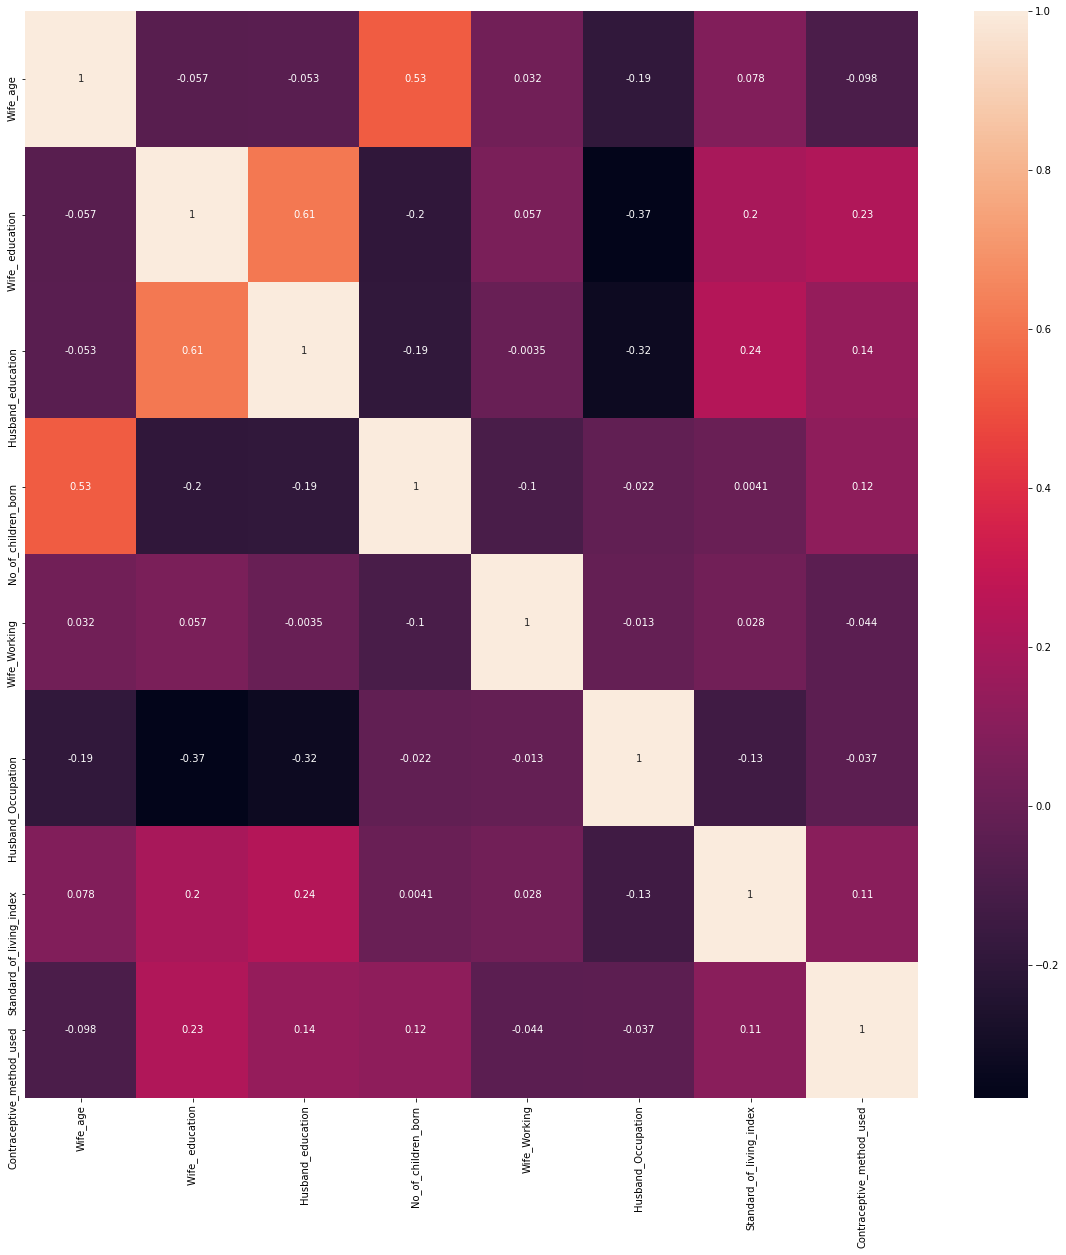

In [35]:
#Showing the Heatmap of the dataset
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True)

###### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

#### Split the data into train and test

In [36]:
#Libraries for Splitting the dataset
from sklearn.model_selection import train_test_split

In [37]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_Working', 'Husband_Occupation',
       'Standard_of_living_index', 'Contraceptive_method_used'],
      dtype='object')

In [38]:
#Assigning the variables to X and Y 
X=df[['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_Working', 'Husband_Occupation',
       'Standard_of_living_index', 'Contraceptive_method_used']]
y=df['Husband_Occupation']

In [39]:
#Splitting the data to train and test labels
array = df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,7]   # select all rows and the 8th column which is the classification "Yes", "No" for Contraceptive_method
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

#### LOGISTIC REGRESSION

In [40]:
#Libraries for the Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
# Fit the model on original data
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.657074340527578
[[ 94  89]
 [ 54 180]]
              precision    recall  f1-score   support

         0.0       0.64      0.51      0.57       183
         1.0       0.67      0.77      0.72       234

    accuracy                           0.66       417
   macro avg       0.65      0.64      0.64       417
weighted avg       0.65      0.66      0.65       417



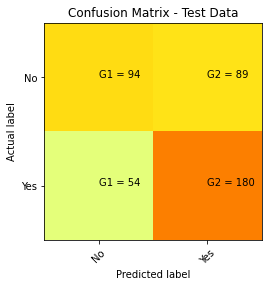

In [42]:
#Calculating the Actual and Predicted value for the Test data
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No', 'Yes']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Linear Discriminent Analysis

In [43]:
#Importing the libraries necessary for the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [44]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_Working,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used
0,24.0,2.0,3.0,3.0,0.0,2.0,4.0,0.0
1,45.0,1.0,3.0,10.0,0.0,3.0,3.0,0.0
2,43.0,2.0,3.0,7.0,0.0,3.0,3.0,0.0
3,42.0,3.0,2.0,9.0,0.0,3.0,4.0,0.0
4,36.0,3.0,3.0,8.0,0.0,3.0,2.0,0.0


In [45]:
#Scalling the Data for the variable Contraceptive_method
scaler=StandardScaler()
X = scaler.fit_transform(df.drop(['Contraceptive_method_used'],axis=1))
Y = df['Contraceptive_method_used']

In [46]:
#Checkng the total values present in the binary operation
Y.value_counts()

1.0    774
0.0    614
Name: Contraceptive_method_used, dtype: int64

In [47]:
#Calling the Linear discriinant analysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [48]:
pred_class = model.predict(X)
df['Prediction'] = pred_class 

In [49]:
#Confusion matrix is for the prediction class
confusion_matrix(Y, pred_class)

array([[304, 310],
       [155, 619]], dtype=int64)

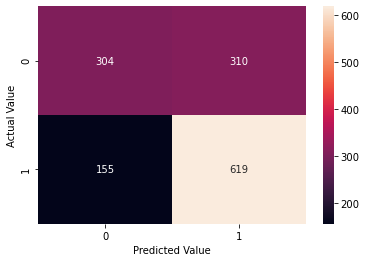

In [50]:
#Ploting the Actual and Predicted values of the LDA 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [51]:
#Generating the Classification report for the Linear discriminent analysis
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

         0.0       0.66      0.50      0.57       614
         1.0       0.67      0.80      0.73       774

    accuracy                           0.66      1388
   macro avg       0.66      0.65      0.65      1388
weighted avg       0.66      0.66      0.66      1388



In [52]:
X.shape

(1388, 7)

In [53]:
#Getting the Coefficients values of the Model
model.coef_

array([[-0.5507807 ,  0.59496081,  0.04638562,  0.6890541 , -0.04953592,
         0.08202671,  0.16487058]])

In [54]:
#Getting the Intercept value of the model
model.intercept_

array([0.26567489])

In [93]:
''' LDF=0.2656+ X1*(-0.5507) + X2*(0.5949) + X3*(0.0463) + X4*(0.6890) + X5*(-.04953) + X6*(0.08202) + X7*(0.16487) 
'''

' LDF=0.2656+ X1*(-0.5507) + X2*(0.5949) + X3*(0.0463) + X4*(0.6890) + X5*(-.04953) + X6*(0.08202) + X7*(0.16487) \n'

In [56]:
DS=[]
coef=[-0.5507807 ,  0.59496081,  0.04638562,  0.6890541 , -0.04953592,
         0.08202671,  0.16487058] # Coefficients 
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1]):
        s3=s3+(X[p,q]*coef[q]) # Building the LDF equation 
    s3=s3+0.2656
    DS.append(s3)
    

In [57]:
#Calculating the Probability values
s1=0
s2=0
for i in range(len(X)):
    if DS[i]>=0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],">=0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1+=1
    elif DS[i]<0:
        print("FOR Row:",i," ",X[i,:])
        print()
        #print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">0.5 is True}")
        print("-->","{ DS: ",DS[i],"<0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2+=1

FOR Row: 0   [-1.05366309 -0.90014692 -0.53402021 -0.11840582 -0.57845949 -0.2085052
  1.14644671]

--> { DS:  0.40459314272852687 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1   [ 1.53917539 -1.88548124 -0.53402021  2.86198527 -0.57845949  0.96317585
  0.05203953]

--> { DS:  0.3595967410509116 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 2   [ 1.29223839 -0.90014692 -0.53402021  1.5846748  -0.57845949  0.96317585
  0.05203953]

--> { DS:  0.20170416515844486 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 3   [ 1.16876989  0.08518741 -1.80978622  2.43621512 -0.57845949  0.96317585
  1.14644671]

--> { DS:  1.5639592313904225 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 4   [ 0.4279589   

FOR Row: 65   [-1.05366309 -0.90014692  0.7417458  -0.96994613 -0.57845949  0.96317585
 -2.13677482]

--> { DS:  -0.5681845012245008 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 66   [ 1.41570689  1.07052173 -1.80978622  2.01044496 -0.57845949  0.96317585
  1.14644671]

--> { DS:  1.7208077338845618 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 67   [-0.3128521  -0.90014692 -0.53402021 -0.11840582 -0.57845949  0.96317585
 -2.13677482]

--> { DS:  -0.4486287528631571 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 68   [-1.17713159  0.08518741  0.7417458  -0.54417598 -0.57845949  0.96317585
  0.05203953]

--> { DS:  0.7403046369570752 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 69   [-0.930194

--> { DS:  -0.7437105334021692 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 160   [-0.3128521   1.07052173  0.7417458  -1.39571629  1.72872952 -1.38018625
  0.05203953]

--> { DS:  -0.04275287805166306 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 161   [ 1.41570689 -1.88548124 -0.53402021 -1.39571629 -0.57845949 -0.2085052
  1.14644671]

--> { DS:  -2.421859506669928 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 162   [ 0.92183289  0.08518741 -0.53402021 -0.96994613  1.72872952  0.96317585
  1.14644671]

--> { DS:  -0.7021735437998551 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 163   [ 0.1810219   1.07052173  0.7417458   0.30736433 -0.57845949 -0.2085052
  1.14644671]

--> { DS:  1.249578962

--> { DS:  -2.1706940025675037 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 286   [-1.05366309  1.07052173  0.7417458  -0.96994613 -0.57845949 -0.2085052
 -1.04236765]

--> { DS:  0.6886125174805695 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 287   [ 0.4279589   1.07052173  0.7417458   0.30736433 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  0.8370261416628164 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 288   [ 1.78611239 -1.88548124 -1.80978622 -0.54417598 -0.57845949 -0.2085052
  0.05203953]

--> { DS:  -2.278727105763927 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 289   [ 0.92183289  1.07052173  0.7417458  -0.11840582 -0.57845949  0.96317585
  0.05203953]

--> { DS:  0.4638494881

--> { DS:  0.406293732253097 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 423   [-1.17713159  1.07052173  0.7417458  -0.96994613 -0.57845949 -1.38018625
 -1.04236765]

--> { DS:  0.6605074419783774 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 424   [-1.79447409  0.08518741  0.7417458  -0.96994613 -0.57845949  0.96317585
  0.05203953]

--> { DS:  0.7869462967768821 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 425   [-0.93019459  0.08518741  0.7417458  -0.11840582 -0.57845949 -0.2085052
  1.14644671]

--> { DS:  0.982001580778936 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 426   [ 0.5514274   1.07052173  0.7417458  -0.54417598  1.72872952  0.96317585
  1.14644671]

--> { DS:  0.4406298314

--> { DS:  0.29335060685283987 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 551   [ 2.03304938  0.08518741 -0.53402021  3.28775543 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  1.3612114779655298 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 552   [ 1.04530139  0.08518741 -0.53402021  0.73313449 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  0.14497197745489726 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 553   [ 1.29223839  0.08518741  0.7417458   0.73313449 -0.57845949  0.96317585
 -1.04236765]

--> { DS:  0.0799237793406842 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 554   [ 1.78611239 -1.88548124 -2.44766923  2.86198527 -0.57845949  0.96317585
  1.14644671]

--> { DS:  0.31525

FOR Row: 585   [ 0.0575534   1.07052173  0.7417458   0.73313449 -0.57845949 -0.2085052
  0.05203953]

--> { DS:  1.4305261543845322 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 586   [ 0.3044904  -0.90014692  0.7417458  -0.11840582  1.72872952  0.96317585
  0.05203953]

--> { DS:  -0.4828895245307719 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 587   [-0.1893836   1.07052173 -1.80978622 -0.54417598 -0.57845949 -1.38018625
  1.14644671]

--> { DS:  0.6523702813826546 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 588   [ 0.5514274   1.07052173  0.7417458  -0.11840582 -0.57845949  0.96317585
  0.05203953]

--> { DS:  0.6678616871361941 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 589   [ 1.53

  1.14644671]

--> { DS:  0.16015991618074174 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 668   [ 0.0575534   0.08518741 -0.53402021 -0.11840582 -0.57845949  0.96317585
  1.14644671]

--> { DS:  0.47490099456734824 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 669   [ 0.4279589   1.07052173  0.7417458   1.15890465 -0.57845949 -1.38018625
 -1.04236765]

--> { DS:  1.2433479389317834 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 670   [ 1.04530139  1.07052173  0.7417458  -0.96994613 -0.57845949  0.96317585
  1.14644671]

--> { DS:  -0.010476375483586653 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 671   [ 0.6748959   0.08518741  0.7417458  -0.11840582 -0.57845949  0.96317585
 -1.04236765]

-


--> { DS:  1.1981885076793388 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 723   [ 1.41570689  1.07052173  0.7417458   3.28775543 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  2.3466443140421593 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 724   [ 0.3044904   0.08518741  0.7417458   0.30736433 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  0.3187949009622634 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 725   [-1.17713159  1.07052173  0.7417458  -0.54417598 -0.57845949  0.96317585
  0.05203953]

--> { DS:  1.3265399439953314 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 726   [-1.05366309 -0.90014692  0.7417458  -0.54417598 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  -0.10615

--> { DS:  -0.1372251419463396 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 819   [ 0.6748959  -0.90014692 -0.53402021 -0.11840582 -0.57845949 -0.2085052
  0.05203953]

--> { DS:  -0.7278993324677738 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 820   [ 0.0575534  -0.90014692 -1.80978622 -0.54417598 -0.57845949  0.96317585
  0.05203953]

--> { DS:  -0.6443257281579273 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 821   [ 1.04530139  1.07052173  0.7417458   2.01044496 -0.57845949 -1.38018625
  0.05203953]

--> { DS:  1.6705204974491397 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 822   [-1.30060009  0.08518741  0.7417458  -0.96994613  1.72872952 -1.38018625
  0.05203953]

--> { DS:  0.20842301

--> { DS:  0.7907414777346602 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 942   [-0.1893836   1.07052173  0.7417458  -0.11840582 -0.57845949  2.1348569
  0.05203953]

--> { DS:  1.17199522700231 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 943   [-0.93019459 -0.90014692 -0.53402021  0.73313449 -0.57845949 -0.2085052
  1.14644671]

--> { DS:  0.9233464201282435 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 944   [-0.80672609  0.08518741 -1.80978622  0.73313449 -0.57845949 -0.2085052
 -1.04236765]

--> { DS:  1.021529370542035 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 945   [-1.17713159 -0.90014692 -0.53402021 -0.11840582 -0.57845949 -0.2085052
  1.14644671]

--> { DS:  0.47259720906623

FOR Row: 1001   [-0.5597891   0.08518741  0.7417458  -0.96994613 -0.57845949 -0.2085052
 -1.04236765]

--> { DS:  -0.1696390549085005 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1002   [ 0.0575534  -1.88548124 -1.80978622 -1.39571629  1.72872952  0.96317585
  1.14644671]

--> { DS:  -1.7511715627310105 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1003   [ 1.29223839  1.07052173  0.7417458   1.15890465 -0.57845949 -1.38018625
  1.14644671]

--> { DS:  1.1281905675047657 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1004   [ 0.1810219   0.08518741  0.7417458   0.30736433 -0.57845949 -1.38018625
  1.14644671]

--> { DS:  0.5672345137684198 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1005   [

--> { DS:  0.4098535831454604 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1079   [ 1.41570689 -1.88548124 -1.80978622 -0.54417598 -0.57845949  0.96317585
 -2.13677482]

--> { DS:  -2.3394768578478273 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1080   [ 1.16876989  1.07052173  0.7417458  -0.11840582  1.72872952 -1.38018625
  0.05203953]

--> { DS:  0.021334341502026344 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1081   [-0.5597891   1.07052173  0.7417458  -0.54417598 -0.57845949 -1.38018625
  1.14644671]

--> { DS:  0.9747368750954766 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1082   [ 0.1810219  -0.90014692  0.7417458   1.15890465  1.72872952  0.96317585
  0.05203953]

--> { DS:  0.4

--> { DS:  0.3077208091402642 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1125   [-1.30060009 -0.90014692 -1.80978622 -0.96994613 -0.57845949  0.96317585
 -2.13677482]

--> { DS:  -0.5505307632488059 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1126   [-0.0659151  -0.90014692 -1.80978622 -0.54417598 -0.57845949 -0.2085052
  0.05203953]

--> { DS:  -0.6724308036601192 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1127   [ 1.04530139 -1.88548124 -0.53402021 -0.11840582  1.72872952 -0.2085052
  0.05203953]

--> { DS:  -1.6324355687850003 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1128   [-1.30060009  0.08518741 -0.53402021 -0.54417598 -0.57845949 -0.2085052
  0.05203953]

--> { DS:  0.653022

 -1.04236765]

--> { DS:  0.4993812830574676 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1203   [ 0.3044904  -1.88548124 -1.80978622  2.43621512  1.72872952  0.96317585
 -2.13677482]

--> { DS:  0.21192171200661408 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1204   [-0.4363206   1.07052173  0.7417458  -0.11840582 -0.57845949  0.96317585
 -1.04236765]

--> { DS:  1.0314586713693683 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1205   [-0.80672609  0.08518741 -0.53402021 -0.54417598 -0.57845949 -1.38018625
  1.14644671]

--> { DS:  0.46533250338277105 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1206   [-1.30060009  0.08518741 -0.53402021 -0.54417598 -0.57845949  0.96317585
  1.14644671]


--> { DS:  0.4837278635551958 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1317   [-0.0659151  -0.90014692 -0.53402021  1.15890465  1.72872952  0.96317585
 -1.04236765]

--> { DS:  0.3616459462701596 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1318   [-0.0659151   0.08518741 -0.53402021 -0.54417598 -0.57845949  0.96317585
 -2.13677482]

--> { DS:  -0.2917802503690174 <0 , Classify as 0}
------------------------------------------------------------------------------------------
FOR Row: 1319   [-0.0659151  -0.90014692  0.7417458   1.5846748  -0.57845949  0.96317585
  1.14644671]

--> { DS:  1.1893616386914914 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1320   [-0.0659151   0.08518741 -0.53402021 -0.96994613 -0.57845949  0.96317585
 -2.13677482]

--> { DS:  -0.58

In [58]:
#Printing the total values classified in the variable
print(s1," rows classified as 1 (Yes) ")
print(s2," rows classified as 0 (NO) ")

928  rows classified as 1 (Yes) 
460  rows classified as 0 (NO) 


In [59]:
pred_prob=model.predict_proba(X)#Posterior Probability for each row

In [60]:
pred_prob[:,1]

array([0.59980869, 0.58896094, 0.5502743 , ..., 0.39651889, 0.47594532,
       0.66812988])

In [61]:
'''
Classification Rule :

if prob(Y=1|X) >=0 then Classify as 1 
else ifprob(Y=1|X) <0 then Classify as 0 
'''
s3,s4=0,0
for i in range(len(pred_prob[:,1])):
    if pred_prob[:,1][i]>=0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],">=0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3+=1
    elif pred_prob[:,1][i]<0.5:
        print("FOR Row:",i," ",X[i,:])
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i],"< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4+=1

FOR Row: 0   [-1.05366309 -0.90014692 -0.53402021 -0.11840582 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.5998086860467422 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1   [ 1.53917539 -1.88548124 -0.53402021  2.86198527 -0.57845949  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.5889609391134957 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 2   [ 1.29223839 -0.90014692 -0.53402021  1.5846748  -0.57845949  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.5502743007118841 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 3   [ 1.16876989  0.08518741 -1.80978622  2.43621512 -0.57845949  0.96317585
  1.14644671]

--> { prob(Y=1|X) = 0.8269314586939253 >=0.5 , Classify as 1 }
------------------------------------------------------------------------

FOR Row: 117   [ 2.03304938  1.07052173 -0.53402021  0.73313449 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.613913907159674 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 118   [-0.80672609 -0.90014692 -0.53402021 -0.54417598 -0.57845949  0.96317585
  1.14644671]

--> { prob(Y=1|X) = 0.5178400148771733 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 119   [ 0.6748959  -1.88548124 -1.80978622 -0.96994613 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.12346766664553072 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 120   [ 0.4279589  -0.90014692 -0.53402021  0.73313449 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.5437321119273164 >=0.5 , Classify as 1 }
------------------------------------------------------------------

--> { prob(Y=1|X) = 0.33082002457961346 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 189   [-0.1893836   0.08518741  0.7417458  -0.11840582  1.72872952  0.96317585
 -1.04236765]

--> { prob(Y=1|X) = 0.5485964536816988 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 190   [ 1.41570689 -1.88548124 -2.44766923  3.28775543 -0.57845949  2.1348569
 -2.13677482]

--> { prob(Y=1|X) = 0.5908611861248957 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 191   [-1.05366309  0.08518741 -0.53402021 -0.54417598 -0.57845949  0.96317585
  1.14644671]

--> { prob(Y=1|X) = 0.6886110452300291 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 192   [-1.79447409  0.08518741  0.7417458  -1.39571629  1.72872952

FOR Row: 241   [-0.0659151   0.08518741  0.7417458   0.30736433 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.6278214236510096 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 242   [ 0.1810219   1.07052173  0.7417458  -0.54417598 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.5954041659735787 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 243   [ 0.1810219   1.07052173  0.7417458  -0.54417598  1.72872952 -1.38018625
  1.14644671]

--> { prob(Y=1|X) = 0.6112331436276076 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 244   [-1.17713159  1.07052173  0.7417458  -0.54417598 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.7566493534721408 >=0.5 , Classify as 1 }
---------------------------------------------------------------

FOR Row: 334   [-0.5597891   0.08518741  0.7417458  -0.11840582 -0.57845949 -0.2085052
 -2.13677482]

--> { prob(Y=1|X) = 0.5589144646783194 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 335   [-0.3128521  -0.90014692 -0.53402021  0.30736433  1.72872952  0.96317585
 -1.04236765]

--> { prob(Y=1|X) = 0.47775759744152857 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 336   [ 1.16876989  0.08518741 -0.53402021  2.01044496 -0.57845949  2.1348569
  1.14644671]

--> { prob(Y=1|X) = 0.8062682079047492 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 337   [-1.17713159  1.07052173  0.7417458  -1.39571629 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.6556002868926134 >=0.5 , Classify as 1 }
-----------------------------------------------------------------

  0.05203953]

--> { prob(Y=1|X) = 0.5454590234768403 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 390   [ 2.03304938 -1.88548124 -0.53402021  1.15890465 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.2346984452130373 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 391   [ 1.90958089 -1.88548124 -2.44766923  2.01044496  1.72872952 -0.2085052
 -1.04236765]

--> { prob(Y=1|X) = 0.2868572074877032 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 392   [-1.67100559 -0.90014692 -1.80978622 -1.39571629 -0.57845949 -0.2085052
 -1.04236765]

--> { prob(Y=1|X) = 0.3645902544236026 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 393   [ 1.66264389 -1.88548124 -1.80978622 -0.11840582

--> { prob(Y=1|X) = 0.7472870346569275 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 441   [ 0.4279589   1.07052173  0.7417458  -0.11840582 -0.57845949 -1.38018625
  1.14644671]

--> { prob(Y=1|X) = 0.6735219565305538 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 442   [-1.54753709  0.08518741  0.7417458  -0.96994613 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.6352725853808889 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 443   [-1.17713159  1.07052173  0.7417458  -0.96994613 -0.57845949  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.7375428102315778 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 444   [-0.80672609 -0.90014692  0.7417458  -0.54417598 -0.57845949 

FOR Row: 583   [ 0.92183289  1.07052173  0.7417458   1.15890465 -0.57845949 -1.38018625
  1.14644671]

--> { prob(Y=1|X) = 0.7912171339159174 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 584   [ 1.41570689  1.07052173  0.7417458  -0.11840582 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.499922455852367 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 585   [ 0.0575534   1.07052173  0.7417458   0.73313449 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.8069949460654557 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 586   [ 0.3044904  -0.90014692  0.7417458  -0.11840582  1.72872952  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.3815877112406014 < 0.5 , Classify as 0 }
-----------------------------------------------------------------

FOR Row: 639   [-1.54753709  0.08518741  0.7417458  -0.54417598 -0.57845949 -1.38018625
  1.14644671]

--> { prob(Y=1|X) = 0.71760429221858 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 640   [-0.5597891   1.07052173  0.7417458  -0.96994613 -0.57845949  0.96317585
 -1.04236765]

--> { prob(Y=1|X) = 0.6254580098131653 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 641   [-0.0659151  -0.90014692 -0.53402021  0.73313449  1.72872952 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.5825144645659219 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 642   [-0.68325759  0.08518741 -0.53402021 -0.96994613  1.72872952  0.96317585
  1.14644671]

--> { prob(Y=1|X) = 0.5453634668656752 >=0.5 , Classify as 1 }
------------------------------------------------------------------

FOR Row: 722   [-0.1893836  -0.90014692 -0.53402021  1.5846748  -0.57845949  0.96317585
  1.14644671]

--> { prob(Y=1|X) = 0.7682157048523187 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 723   [ 1.41570689  1.07052173  0.7417458   3.28775543 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.9126730972340207 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 724   [ 0.3044904   0.08518741  0.7417458   0.30736433 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.5790487858107878 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 725   [-1.17713159  1.07052173  0.7417458  -0.54417598 -0.57845949  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.7902801353728526 >=0.5 , Classify as 1 }
---------------------------------------------------------------

FOR Row: 803   [-1.42406859  0.08518741  0.7417458  -0.54417598 -0.57845949  0.96317585
  1.14644671]

--> { prob(Y=1|X) = 0.7420829856004549 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 804   [ 1.04530139 -1.88548124  0.7417458   2.43621512 -0.57845949 -0.2085052
 -2.13677482]

--> { prob(Y=1|X) = 0.48513093062135526 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 805   [ 0.5514274  -0.90014692  0.7417458  -0.11840582 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.39646706476638466 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 806   [-0.68325759  1.07052173  0.7417458  -0.11840582 -0.57845949  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.7937987327376099 >=0.5 , Classify as 1 }
---------------------------------------------------------------

  1.14644671]

--> { prob(Y=1|X) = 0.5523857085078381 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 865   [ 0.6748959   1.07052173  0.7417458  -0.54417598  1.72872952 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.50001170795148 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 866   [ 1.29223839  1.07052173  0.7417458   0.73313449 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.6580128349172976 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 867   [-1.42406859  0.08518741 -0.53402021 -0.96994613 -0.57845949 -0.2085052
 -1.04236765]

--> { prob(Y=1|X) = 0.5615086532971164 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 868   [-0.3128521   0.08518741  0.7417458  -0.54417598

FOR Row: 941   [ 0.3044904   1.07052173  0.7417458   0.30736433  1.72872952 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.6880065943619762 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 942   [-0.1893836   1.07052173  0.7417458  -0.11840582 -0.57845949  2.1348569
  0.05203953]

--> { prob(Y=1|X) = 0.7635189918633496 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 943   [-0.93019459 -0.90014692 -0.53402021  0.73313449 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.7157387067212412 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 944   [-0.80672609  0.08518741 -1.80978622  0.73313449 -0.57845949 -0.2085052
 -1.04236765]

--> { prob(Y=1|X) = 0.7352849725088495 >=0.5 , Classify as 1 }
------------------------------------------------------------------

FOR Row: 1030   [ 1.29223839  1.07052173  0.7417458  -0.11840582 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.5408594378250474 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1031   [ 0.0575534  -1.88548124 -2.44766923  0.73313449 -0.57845949  0.96317585
 -2.13677482]

--> { prob(Y=1|X) = 0.32282708527823745 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1032   [ 0.5514274   0.08518741  0.7417458   1.5846748  -0.57845949  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.7782014589529591 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1033   [ 0.4279589  -0.90014692 -2.44766923  1.15890465 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.593870559369957 >=0.5 , Classify as 1 }
-------------------------------------------------------------

--> { prob(Y=1|X) = 0.4821999279759584 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1092   [ 1.90958089  1.07052173  0.7417458  -0.96994613 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.29753080537358034 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1093   [ 1.16876989 -1.88548124 -0.53402021  3.28775543 -0.57845949 -0.2085052
  0.05203953]

--> { prob(Y=1|X) = 0.6815606800323808 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1094   [-0.0659151   1.07052173  0.7417458  -0.11840582 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.6933310194511715 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1095   [ 0.0575534   1.07052173  0.7417458  -0.11840582  1.7287

 -2.13677482]

--> { prob(Y=1|X) = 0.25484189696100595 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1151   [ 0.6748959  -0.90014692 -1.80978622  2.86198527 -0.57845949  0.96317585
 -1.04236765]

--> { prob(Y=1|X) = 0.7653651651194444 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1152   [-0.0659151  -1.88548124 -0.53402021  0.30736433 -0.57845949 -0.2085052
 -1.04236765]

--> { prob(Y=1|X) = 0.3115050954138147 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1153   [-0.68325759  1.07052173  0.7417458  -0.11840582 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.7605612404328153 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1154   [ 0.92183289 -1.88548124 -2.44766923 -1.3

--> { prob(Y=1|X) = 0.49397089310811587 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1241   [ 1.16876989 -0.90014692  0.7417458   0.73313449 -0.57845949 -0.2085052
  1.14644671]

--> { prob(Y=1|X) = 0.4567407675723983 < 0.5 , Classify as 0 }
------------------------------------------------------------------------------------------
FOR Row: 1242   [ 1.04530139  1.07052173  0.7417458   1.15890465 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.7472196079821145 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1243   [ 1.29223839  1.07052173  0.7417458   0.73313449 -0.57845949 -1.38018625
  0.05203953]

--> { prob(Y=1|X) = 0.6580128349172976 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1244   [ 0.1810219   1.07052173  0.7417458  -0.54417598  1.7287

--> { prob(Y=1|X) = 0.5384276125119839 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1346   [-0.0659151   0.08518741  0.7417458  -0.11840582 -0.57845949  0.96317585
 -2.13677482]

--> { prob(Y=1|X) = 0.5152079336430381 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1347   [-0.0659151   1.07052173  0.7417458   0.30736433  1.72872952  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.766212478735005 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1348   [-0.0659151   1.07052173 -0.53402021  0.73313449  1.72872952  0.96317585
  0.05203953]

--> { prob(Y=1|X) = 0.8055340392735723 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1349   [-0.0659151   1.07052173 -0.53402021  0.30736433 -0.57845

In [62]:
print(s3," rows classified as 1 (Yes) ")
print(s4," rows classified as 0 (No) ")

929  rows classified as 1 (Yes) 
459  rows classified as 0 (No) 


#### CART - Decision Tree

In [63]:
#importing the necessary library for the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [64]:
af = pd.read_excel("Contraceptive_method_dataset.xlsx")
af.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [65]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [66]:
af.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [67]:
af.mean(axis=0)

Wife_age               32.606277
No_of_children_born     3.254132
Husband_Occupation      2.137814
dtype: float64

In [68]:
af["Wife_age"].fillna(value = 32, inplace = True)

In [69]:
af["No_of_children_born"].fillna(value = 3, inplace = True)

In [70]:
af.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [71]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [72]:
#Assigning all the Categorical variable to the feature 
for feature in af.columns: 
    if af[feature].dtype == 'object': 
        af[feature] = pd.Categorical(af[feature]).codes

In [73]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int8   
 2   Husband_education          1473 non-null   int8   
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int8   
 5   Wife_Working               1473 non-null   int8   
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int8   
 8   Media_exposure             1473 non-null   int8   
 9   Contraceptive_method_used  1473 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 44.7 KB


In [74]:
X = af.drop("Contraceptive_method_used" , axis=1)
y = af.pop("Contraceptive_method_used")

In [75]:
#Splitting the Dataset
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [76]:
#Decision tree classifier using the gini index
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [77]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [78]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [79]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Importnce"], index = X_train.columns))

                          Importnce
Wife_age                   0.312707
Wife_ education            0.081170
Husband_education          0.086969
No_of_children_born        0.245418
Wife_religion              0.040221
Wife_Working               0.051621
Husband_Occupation         0.086140
Standard_of_living_index   0.087442
Media_exposure             0.008311


In [80]:
#claculating the prediction value for the test data
y_predict = dt_model.predict(X_test)

In [81]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [82]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Importance"], index = X_train.columns))

                          Importance
Wife_age                    0.312707
Wife_ education             0.081170
Husband_education           0.086969
No_of_children_born         0.245418
Wife_religion               0.040221
Wife_Working                0.051621
Husband_Occupation          0.086140
Standard_of_living_index    0.087442
Media_exposure              0.008311


In [83]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

###### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

AUC: 0.805


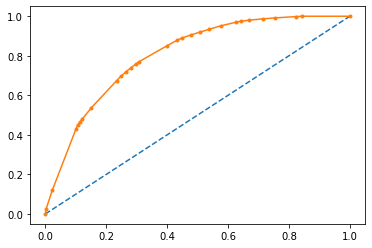

In [84]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.755


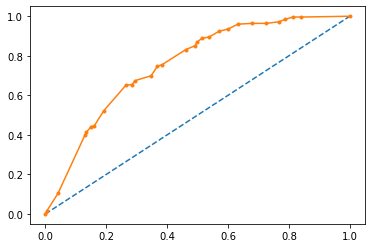

In [85]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [86]:
#classification report for the Train labels
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66       436
           1       0.74      0.88      0.80       595

    accuracy                           0.75      1031
   macro avg       0.75      0.72      0.73      1031
weighted avg       0.75      0.75      0.74      1031



In [87]:
#classification report for the Test labels
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60       193
           1       0.69      0.85      0.76       249

    accuracy                           0.70       442
   macro avg       0.71      0.68      0.68       442
weighted avg       0.71      0.70      0.69       442



In [88]:
#Confusion matric for the Train labels
confusion_matrix(train_labels, ytrain_predict)

array([[248, 188],
       [ 73, 522]], dtype=int64)

In [89]:
#Confusion matric for the Test labels
confusion_matrix(test_labels, ytest_predict)

array([[ 98,  95],
       [ 37, 212]], dtype=int64)

In [90]:
#calculating the model score for the train labels
reg_dt_model.score(X_train,train_labels)

0.7468477206595538

In [91]:
#calculating the model score for the test labels
reg_dt_model.score(X_test,test_labels)


0.7013574660633484